In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [31]:

# Data
data = {
    'Number UEs': [16, 32, 64, 128, 256, 512, 1024],
    'Avg CPU (millicores)': [0.00073, 0.00075, 0.00085, 0.00091, 0.00097, 0.00103, 0.00109],
    'Std Dev CPU': [0.00026, 0.00019, 0.00034, 0.00027, 0.00039, 0.00041, 0.00038],
    'Avg Memory (MB)': [6.68, 6.69, 7.25, 7.49, 7.53, 7.57, 7.61],
    'Std Dev Memory': [0.47, 0.4, 0.51, 0.6, 0.53, 0.61, 0.46],
    'Time (s)': [0.024024069, 0.031508116, 0.040097032, 0.062052087, 0.095843842, 0.147976187, 0.23256436],
    'Std Dev Time': [0.01, 0.015, 0.016, 0.028, 0.043, 0.059, 0.093]
}

df = pd.DataFrame(data)

# Set seaborn style
sns.set(style="darkgrid")

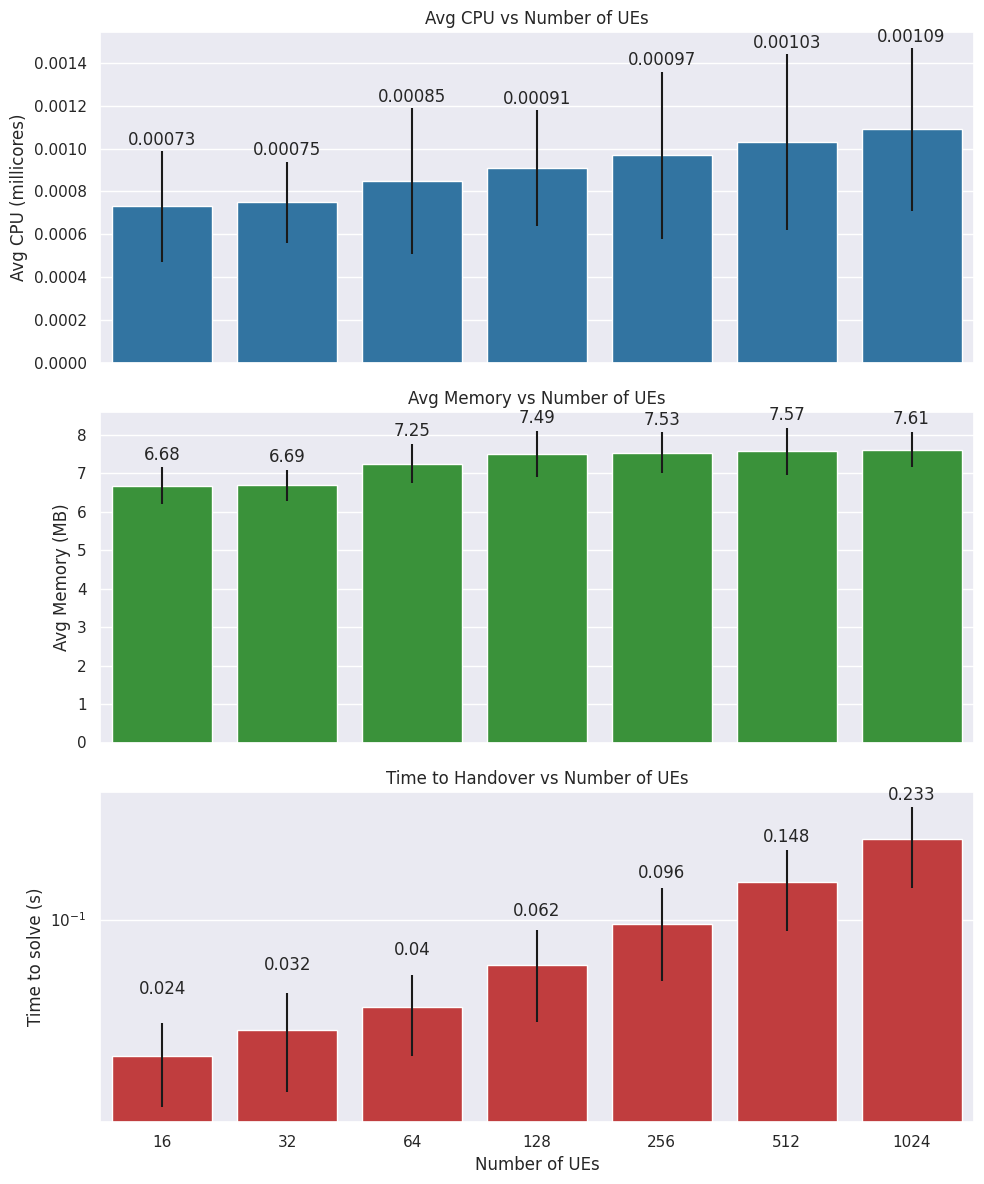

In [32]:
# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

# Bar plot for Avg CPU vs Number UEs
sns.barplot(x='Number UEs', y='Avg CPU (millicores)', yerr=df['Std Dev CPU'], data=df, ax=axs[0], color='tab:blue')
axs[0].set_title('Avg CPU vs Number of UEs')
axs[0].set_ylabel('Avg CPU (millicores)')

# Annotate the values of each bar
for i, v in enumerate(df['Avg CPU (millicores)']):
    axs[0].annotate(str(round(v, 5)), (i, v + df['Std Dev CPU'][i]+0.00001), ha='center', va='bottom')

# Bar plot for Avg Memory vs Number UEs
sns.barplot(x='Number UEs', y='Avg Memory (MB)', yerr=df['Std Dev Memory'], data=df, ax=axs[1], color='tab:green')
axs[1].set_title('Avg Memory vs Number of UEs')
axs[1].set_ylabel('Avg Memory (MB)')

# Annotate the values of each bar
for i, v in enumerate(df['Avg Memory (MB)']):
    axs[1].annotate(str(round(v, 2)), (i, v + df['Std Dev Memory'][i]+0.1), ha='center', va='bottom')

# Bar plot for Time to solve vs Number UEs
sns.barplot(x='Number UEs', y='Time (s)', yerr=df['Std Dev Time'], data=df, ax=axs[2], color='tab:red')
axs[2].set_title('Time to Handover vs Number of UEs')
axs[2].set_xlabel('Number of UEs')
axs[2].set_ylabel('Time to solve (s)')
axs[2].set_yscale('log')

# Annotate the values of each bar
for i, v in enumerate(df['Time (s)']):
    axs[2].annotate(str(round(v, 3)), (i, v + df['Std Dev Time'][i]+0.01), ha='center', va='bottom')

# Adjust layout
plt.tight_layout()
plt.savefig('out/performance-metrics.pdf', bbox_inches='tight')
plt.savefig('out/performance-metrics.png', dpi=300, bbox_inches='tight')
plt.show()